In [23]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg

#matplotlib.style.use('ggplot')
matplotlib.style.use('seaborn')

matplotlib.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import datetime
import time

In [3]:
data = pd.read_csv('atec_anti_fraud_train.csv')

In [4]:
data.head()

id  label      date  f1  f2  \
0  f10eb20f31cf7063ee8bdbd1272214e4d7e0193c8dbce4...      0  20171103   0   0   
1  d861929b67938d06538b910b9f6b85f5eb62b6ad7361ba...      0  20170917   0   1   
2  1270cb8a85eedd57672b2c6297fa5633e36773a2c3a351...      0  20171022   0   0   
3  9fa009724ee7ff9d688ae321304fbc78f608cdabbfdd2b...      0  20171029   0   0   
4  1da482485d7e8bcefae7e9d0d1167cec3ac111cfa71d8b...      0  20171002   1   1   

   f3  f4        f5  f6  f7  ...     f288   f289   f290  f291   f292   f293  \
0   0   0  100807.0   0   5  ...    301.0  312.0  328.0  85.0  302.0  201.0   
1   1   1  100805.0   1   5  ...    302.0  324.0  391.0  13.0  302.0  160.0   
2   1   0  100102.0   0   6  ...      NaN    NaN    NaN   NaN    NaN    NaN   
3   0   1  100807.0   1   4  ...    302.0  322.0  341.0  57.0  251.0  175.0   
4   0   1  100805.0   1   5  ...    302.0  301.0  301.0  74.0  302.0  182.0   

    f294   f295  f296   f297  
0  203.0  203.0  61.0  201.0  
1  160.0  161.0   8.0  160.0  
2    NaN    NaN   NaN    NaN  
3  176.0  176.0  49.0  150.0  
4  181.0  182.0  51.0  181.0  

[5 rows x 300 columns]

In [5]:
data.shape

(994731, 300)

# 1.  Exploratory Analysis

## 1.1 date

In [6]:
date_df = data.iloc[:,1:3]

In [7]:
date_df.head()

label      date
0      0  20171103
1      0  20170917
2      0  20171022
3      0  20171029
4      0  20171002

In [8]:
def strptime(date):
    t = time.strptime(str(date), "%Y%m%d")
    return(t)

data_strptime = date_df.date.apply(strptime)

In [9]:
date_df['year'] = [data_strptime[i][0] for i in range(len(data_strptime))]
date_df['month'] = [data_strptime[i][1] for i in range(len(data_strptime))]
date_df['day'] = [data_strptime[i][2] for i in range(len(data_strptime))]
date_df['weekday'] = [data_strptime[i][6] for i in range(len(data_strptime))]
date_df['strptime'] = data_strptime

In [10]:
date_df.head()

label      date  year  month  day  weekday  \
0      0  20171103  2017     11    3        4   
1      0  20170917  2017      9   17        6   
2      0  20171022  2017     10   22        6   
3      0  20171029  2017     10   29        6   
4      0  20171002  2017     10    2        0   

                              strptime  
0   (2017, 11, 3, 0, 0, 0, 4, 307, -1)  
1   (2017, 9, 17, 0, 0, 0, 6, 260, -1)  
2  (2017, 10, 22, 0, 0, 0, 6, 295, -1)  
3  (2017, 10, 29, 0, 0, 0, 6, 302, -1)  
4   (2017, 10, 2, 0, 0, 0, 0, 275, -1)

In [11]:
date_df = date_df.sort_values(by='strptime')

In [12]:
date_df.head()

label      date  year  month  day  weekday  \
937719      0  20170905  2017      9    5        1   
936071      0  20170905  2017      9    5        1   
741462      0  20170905  2017      9    5        1   
814385      0  20170905  2017      9    5        1   
272696      0  20170905  2017      9    5        1   

                                 strptime  
937719  (2017, 9, 5, 0, 0, 0, 1, 248, -1)  
936071  (2017, 9, 5, 0, 0, 0, 1, 248, -1)  
741462  (2017, 9, 5, 0, 0, 0, 1, 248, -1)  
814385  (2017, 9, 5, 0, 0, 0, 1, 248, -1)  
272696  (2017, 9, 5, 0, 0, 0, 1, 248, -1)

In [13]:
date_df.tail()

label      date  year  month  day  weekday  \
663613      0  20171105  2017     11    5        6   
197795      0  20171105  2017     11    5        6   
197796      0  20171105  2017     11    5        6   
392557      0  20171105  2017     11    5        6   
742380      0  20171105  2017     11    5        6   

                                  strptime  
663613  (2017, 11, 5, 0, 0, 0, 6, 309, -1)  
197795  (2017, 11, 5, 0, 0, 0, 6, 309, -1)  
197796  (2017, 11, 5, 0, 0, 0, 6, 309, -1)  
392557  (2017, 11, 5, 0, 0, 0, 6, 309, -1)  
742380  (2017, 11, 5, 0, 0, 0, 6, 309, -1)

__* The data is from 2017-09-05 to 2017-11-05.__

## 1.1.1 weekday

In [14]:
label_0 = date_df[date_df['label'] == 0]
label_1 = date_df[date_df['label'] == 1]
unlabel = date_df[date_df['label'] == -1]

Text(0.5,0,'weekday')

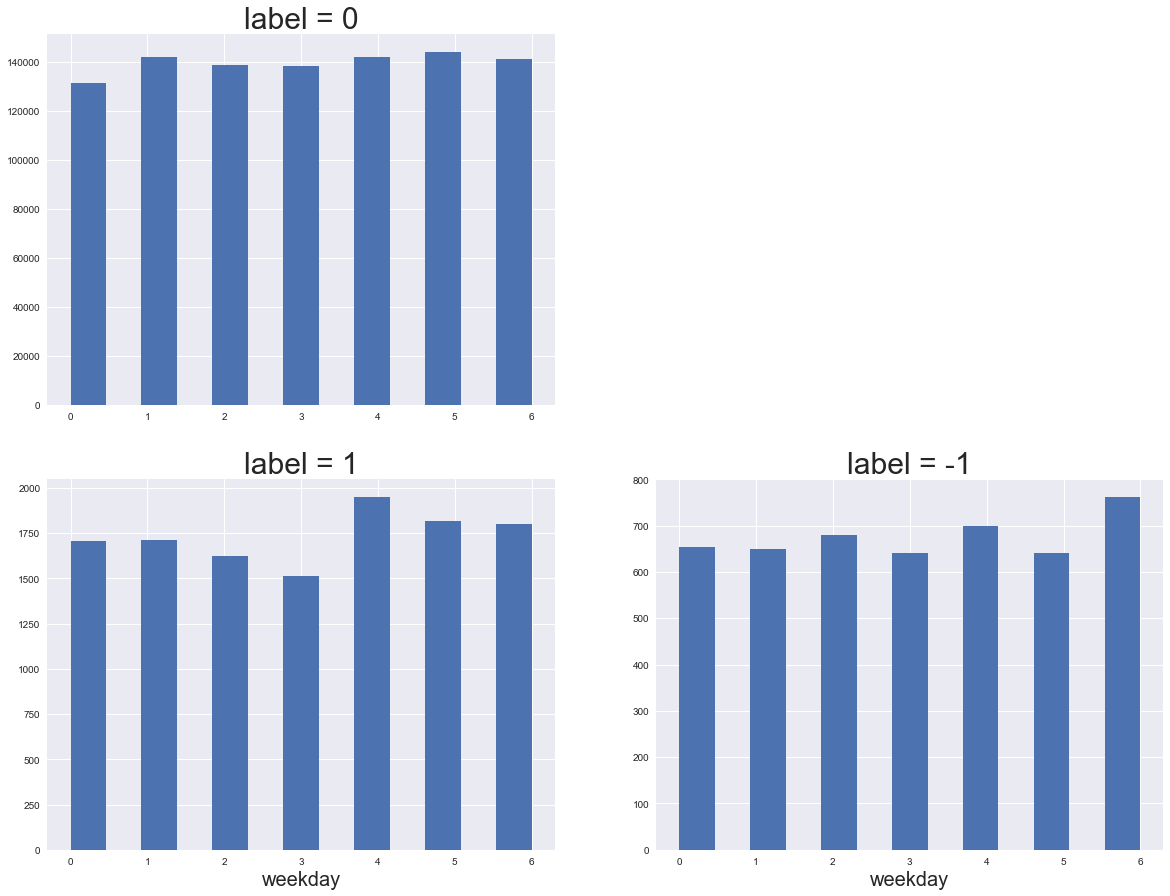

In [15]:
plt.rcParams['figure.figsize'] = (20,15)
plt.subplot(221)
label_0.weekday.hist(bins = 13)
plt.title('label = 0', fontsize = 30)

plt.subplot(223)
label_1.weekday.hist(bins = 13)
plt.title('label = 1', fontsize = 30)
plt.xlabel('weekday',fontsize = 20)

plt.subplot(224)
unlabel.weekday.hist(bins = 13)
plt.title('label = -1', fontsize = 30)
plt.xlabel('weekday',fontsize = 20)

__* Friday, Saturday and Sunday are more likely to having risk.__

## 1.1.2 time in order

In [16]:
import pygal
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly import __version__
import cufflinks as cf

In [17]:
day = date_df['date'].value_counts().index.values
day.sort()
day

array([20170905, 20170906, 20170907, 20170908, 20170909, 20170910,
       20170911, 20170912, 20170913, 20170914, 20170915, 20170916,
       20170917, 20170918, 20170919, 20170920, 20170921, 20170922,
       20170923, 20170924, 20170925, 20170926, 20170927, 20170928,
       20170929, 20170930, 20171001, 20171002, 20171003, 20171004,
       20171005, 20171006, 20171007, 20171008, 20171009, 20171010,
       20171011, 20171012, 20171013, 20171014, 20171015, 20171016,
       20171017, 20171018, 20171019, 20171020, 20171021, 20171022,
       20171023, 20171024, 20171025, 20171026, 20171027, 20171028,
       20171029, 20171030, 20171031, 20171101, 20171102, 20171103,
       20171104, 20171105])

In [18]:
label0_day = []
label1_day = []
unlabel_day = []
for i in day:
    day_ = date_df[date_df['date']==i]
    num = len(day_)
    label0_day.append( len(day_[day_['label'] == 0]) / num )
    label1_day.append( len(day_[day_['label'] == 1]) / num )
    unlabel_day.append( len(day_[day_['label'] == -1]) / num )

In [19]:
each_day = pd.DataFrame({'day': day, 'label 0': label0_day, 'label 1': label1_day, 
                         'unlabel': unlabel_day})

In [20]:
ind = []
for i in range(26):
    ind.append( 'Sep ' + str(i+5) )
    
for i in range(31):
    ind.append( 'Oct ' + str(i+1) )

for i in range(5):
    ind.append( 'Nov ' + str(i+1) )

In [21]:
each_day.index = ind

In [22]:
cf.go_offline()
each_day[['label 1','unlabel']].iplot(kind='spread', title='The rate of label = 1 and unlabel in each day',yTitle = 'rate')


# 2. Modeling

In [31]:
X_raw = data.iloc[:,3:]
y_raw = data.iloc[:,1]

## 2.1 Missing value

## 2.1.1 Impute by median

In [32]:
X = X_raw.copy()
imputer = Imputer(strategy = 'median')
imputer.fit(X)
X_norm = imputer.transform(X)
X = pd.DataFrame(X_norm, columns = X.columns)

## 2.2 Random forest for feature importance

* __We use labeled data first.__

In [38]:
X_label = X[y_raw != -1]
X_label.shape

(990006, 297)

In [40]:
y_label = y_raw[y_raw != -1]
y_label.shape

(990006,)

* __Using three different methods for unbalanced problem.__

## 2.2.1 class_weight = 'balanced_subsample'

<img src="https://s1.ax2x.com/2018/06/05/RFhQ6.png">

In [41]:
rnd_clf_1 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, n_jobs = -1, random_state = 7, 
                                 class_weight = 'balanced_subsample')
rnd_clf_1.fit(X_label, y_label)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=20, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

167 features


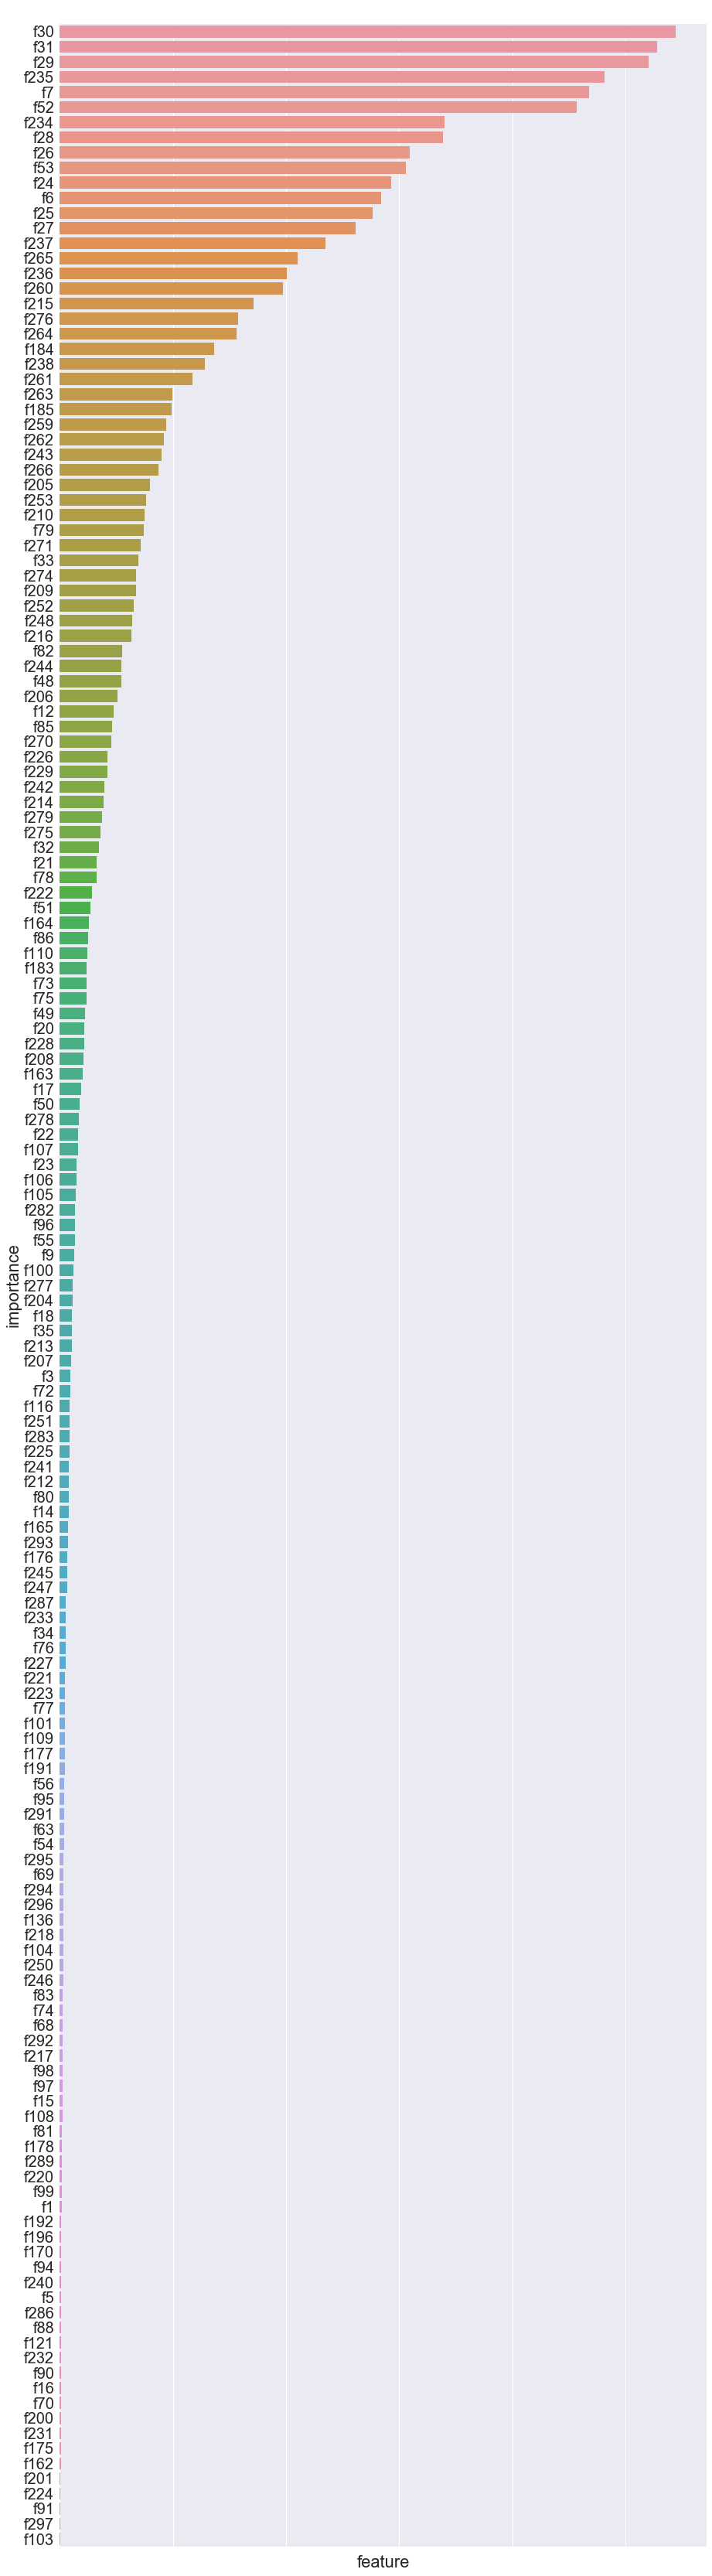

In [74]:
df_1 = pd.DataFrame({'feature': X_label.columns, 
                   'importance': rnd_clf_1.feature_importances_ })
df_1 = df_1.sort_values(by='importance', ascending =False)

df_1_ = df_1[df_1['importance'] != 0 ]
print(str(len(df_1_)) + ' features')

sns.set(rc={'figure.figsize':(15,60)})
sns.set(font_scale=2)                                           # set the font size 
ax = sns.barplot(y = 'feature', x = 'importance',data=df_1_)        #draw the barplot
ax.set(title = " ", xlabel = "feature", ylabel = "importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 0.01)
ax.tick_params(labelsize=20) 

## 2.2.3 class_weight = 'balanced'

In [64]:
rnd_clf_2 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, n_jobs = -1, random_state = 7, 
                                 class_weight = 'balanced')
rnd_clf_2.fit(X_label, y_label)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=20, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

167 features


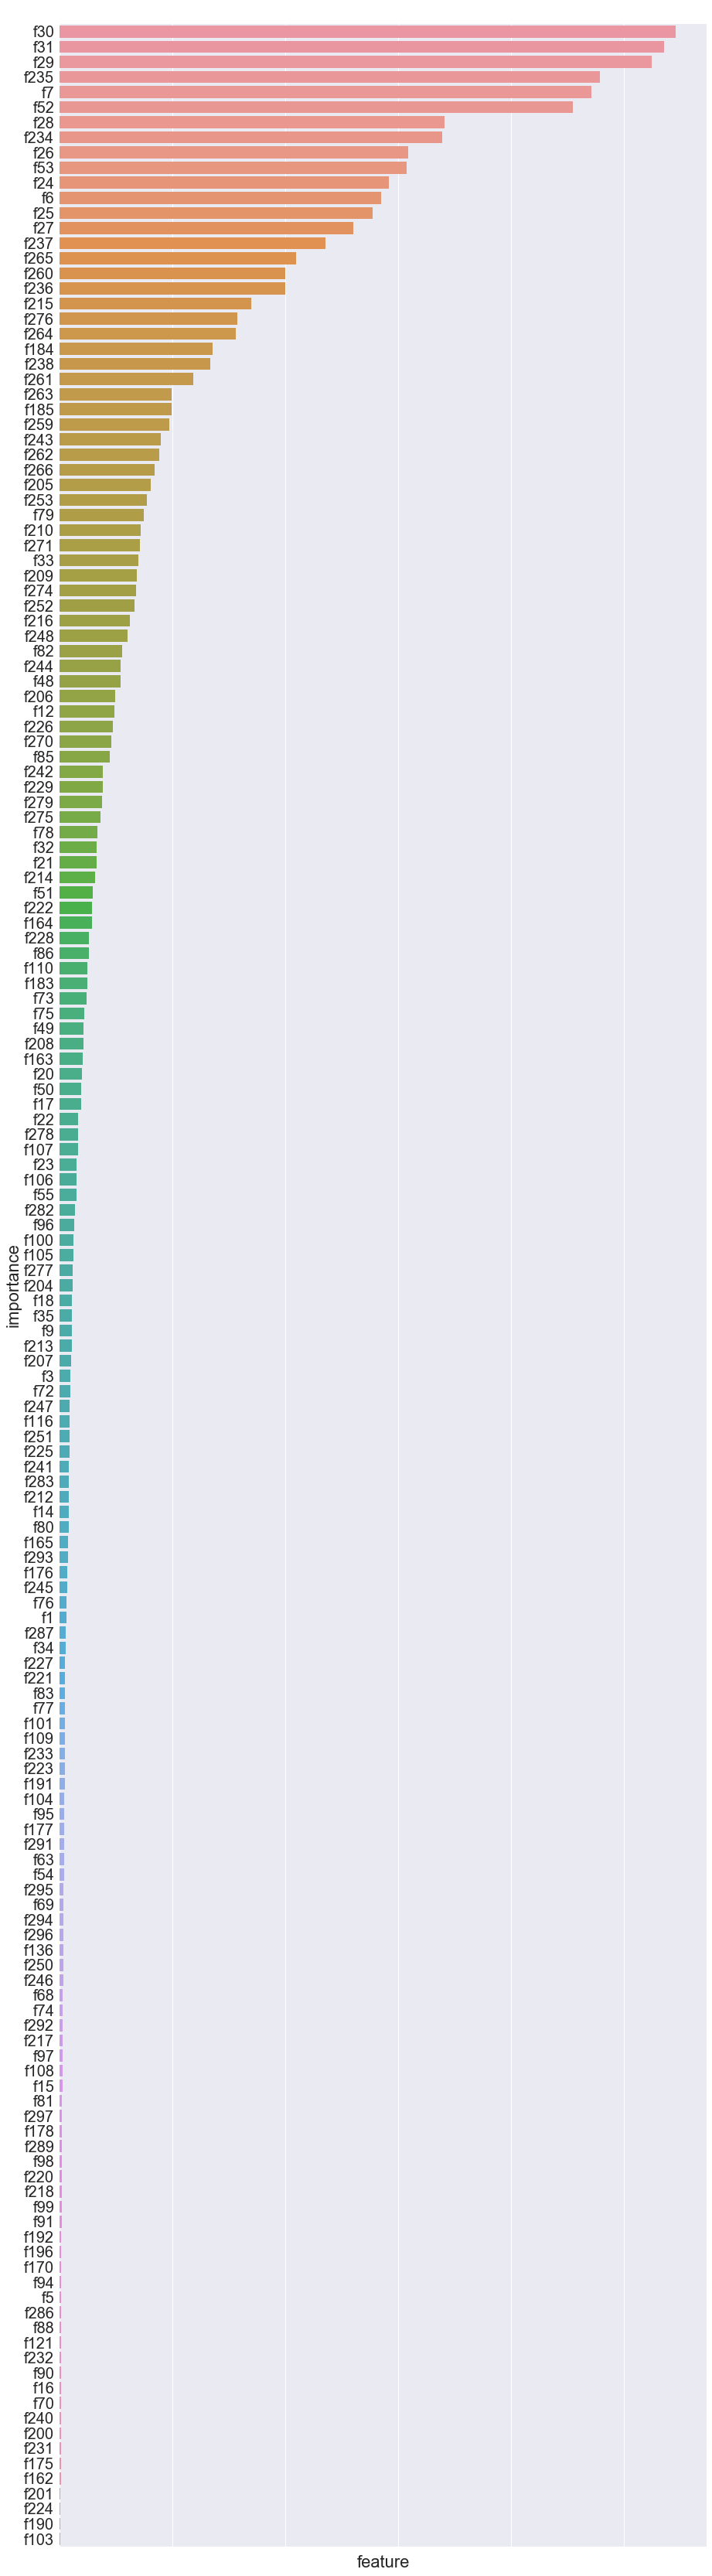

In [75]:
df_2 = pd.DataFrame({'feature': X_label.columns, 
                   'importance': rnd_clf_2.feature_importances_ })
df_2 = df_2.sort_values(by='importance', ascending =False)

df_2_ = df_2[df_2['importance'] != 0 ]
print(str(len(df_2_)) + ' features')

sns.set(rc={'figure.figsize':(15,60)})
sns.set(font_scale=2)                                           # set the font size 
ax = sns.barplot(y = 'feature', x = 'importance', data=df_2_)        #draw the barplot
ax.set(title = " ", xlabel = "feature", ylabel = "importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 0.01)
ax.tick_params(labelsize=20) 

In [110]:
t = pd.concat([df_1_, df_2_], axis = 1)
diff = []
for i in range(len(t)):
    if True in t.isnull().values[i]:
        diff.append(i)
t.iloc[diff,:]

feature  importance feature  importance
55      f56     0.00041     NaN         NaN
189     NaN         NaN    f190    0.000067

* __The different for these two methods are whether f56 and f190 are in the model or not.__

## 2.2.3 fit( sample_weight  ) 

<img src="https://s1.ax2x.com/2018/06/05/RFvcp.png">

In [158]:
num1 = sum(y_label == 1)
num0 = sum(y_label == 0)
           
print("label=1: " + str(num1) + "\nlabel=0: " + str(num0)+ 
      "\nratio: " + str( num0 / num1 ))

label=1: 12122
label=0: 977884
ratio: 80.67018643788154


## 2.2.3.1 weight: 80 : 1

In [162]:
weight_1 = np.ones(len(y_label))
weight_1[y_label == 0] = 1 / ( num1*80 + num0 )
weight_1[y_label == 1] = 80 / ( num1*80 + num0 )
sum(weight_1)

1.0000000000195897

In [164]:
rnd_clf_3 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, n_jobs = -1, random_state = 7)
rnd_clf_3.fit(X_label, y_label, sample_weight = weight_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

168 features


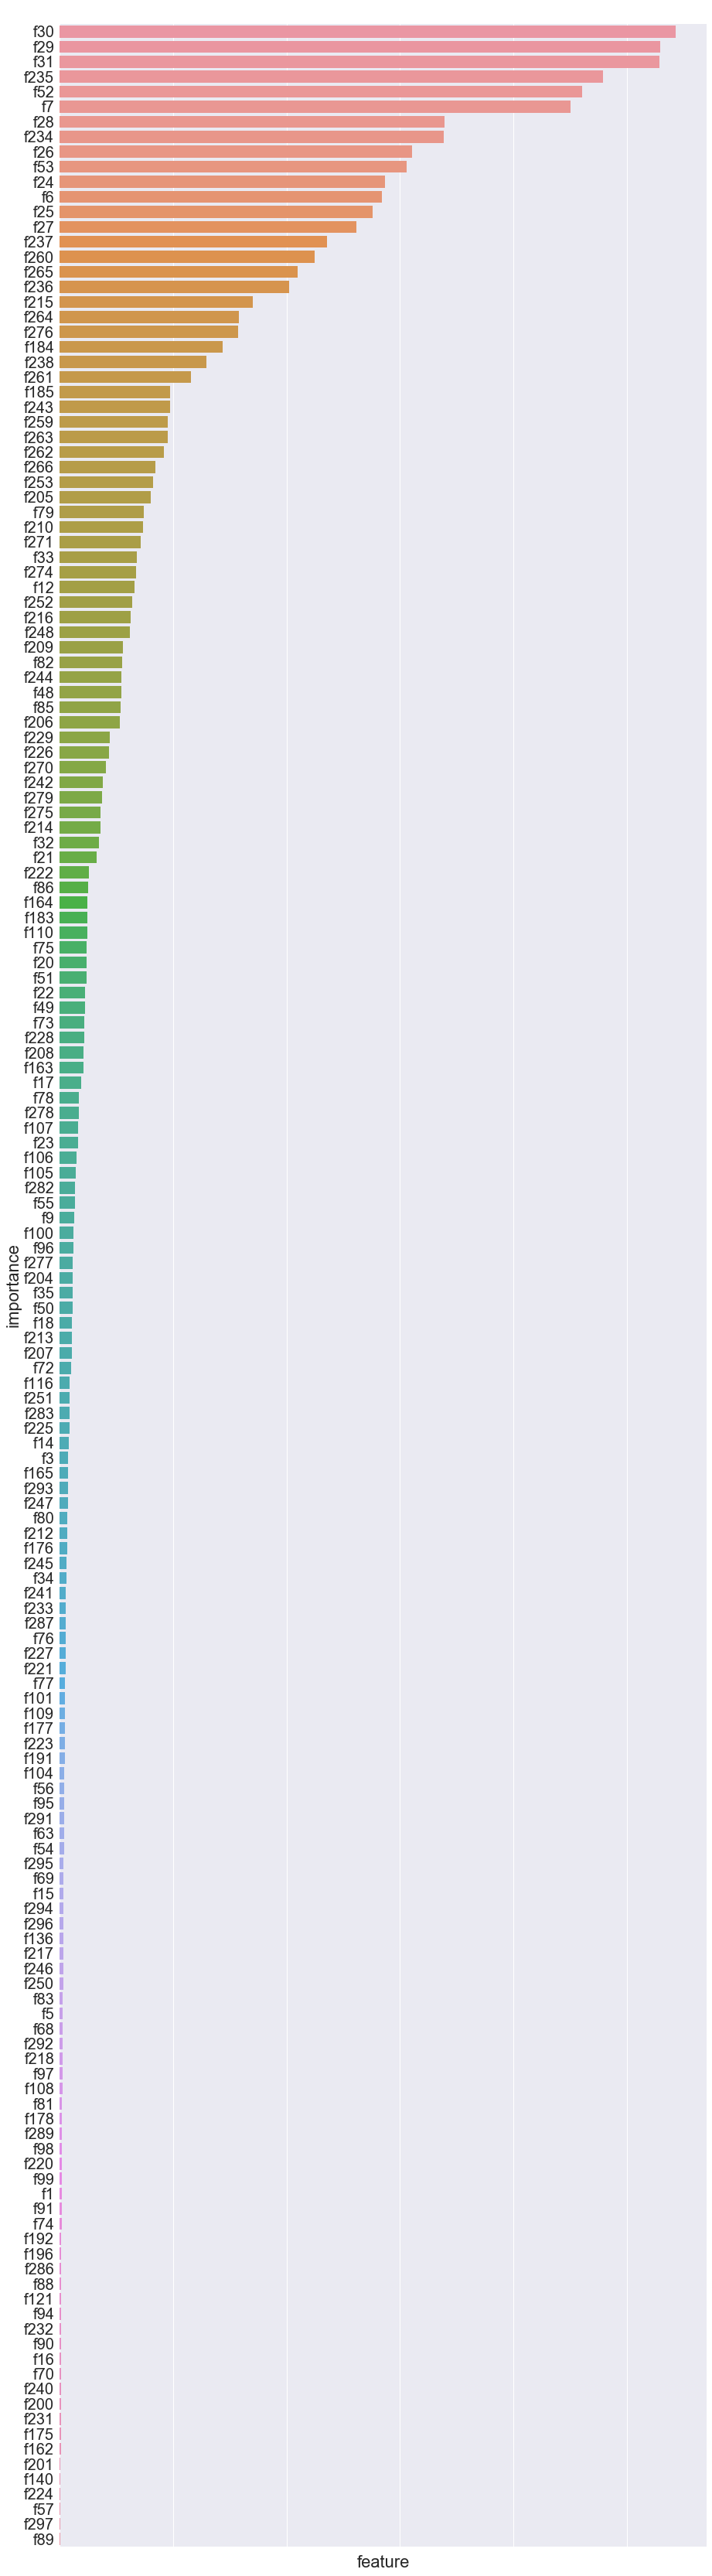

In [167]:
df_3 = pd.DataFrame({'feature': X_label.columns, 
                   'importance': rnd_clf_3.feature_importances_ })
df_3 = df_3.sort_values(by='importance', ascending =False)

df_3_ = df_3[df_3['importance'] != 0 ]
print(str(len(df_3_)) + ' features')

sns.set(rc={'figure.figsize':(15,60)})
sns.set(font_scale=2)                                           # set the font size 
ax = sns.barplot(y = 'feature', x = 'importance', data=df_3_)        #draw the barplot
ax.set(title = " ", xlabel = "feature", ylabel = "importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 0.01)
ax.tick_params(labelsize=20) 

In [168]:
t2 = pd.concat([df_1_, df_2_, df_3_], axis = 1)
diff = []
for i in range(len(t)):
    if True in t2.isnull().values[i]:
        diff.append(i)
t2.iloc[diff,:]

feature  importance feature  importance feature  importance
55      f56    0.000410     NaN         NaN     f56    0.000410
56      NaN         NaN     NaN         NaN     f57    0.000077
88      NaN         NaN     NaN         NaN     f89    0.000037
102    f103    0.000059    f103    0.000058     NaN         NaN
139     NaN         NaN     NaN         NaN    f140    0.000080
169    f170    0.000127    f170    0.000126     NaN         NaN
189     NaN         NaN    f190    0.000067     NaN         NaN

## 2.2.3.1 weight : 30 : 1 

In [169]:
weight_2 = np.ones(len(y_label))
weight_2[y_label == 0] = 1 / ( num1*30 + num0 )
weight_2[y_label == 1] = 30 / ( num1*30 + num0 )
sum(weight_2)

1.0000000000108022

In [170]:
rnd_clf_4 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, n_jobs = -1, random_state = 7)
rnd_clf_4.fit(X_label, y_label, sample_weight = weight_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

178 features


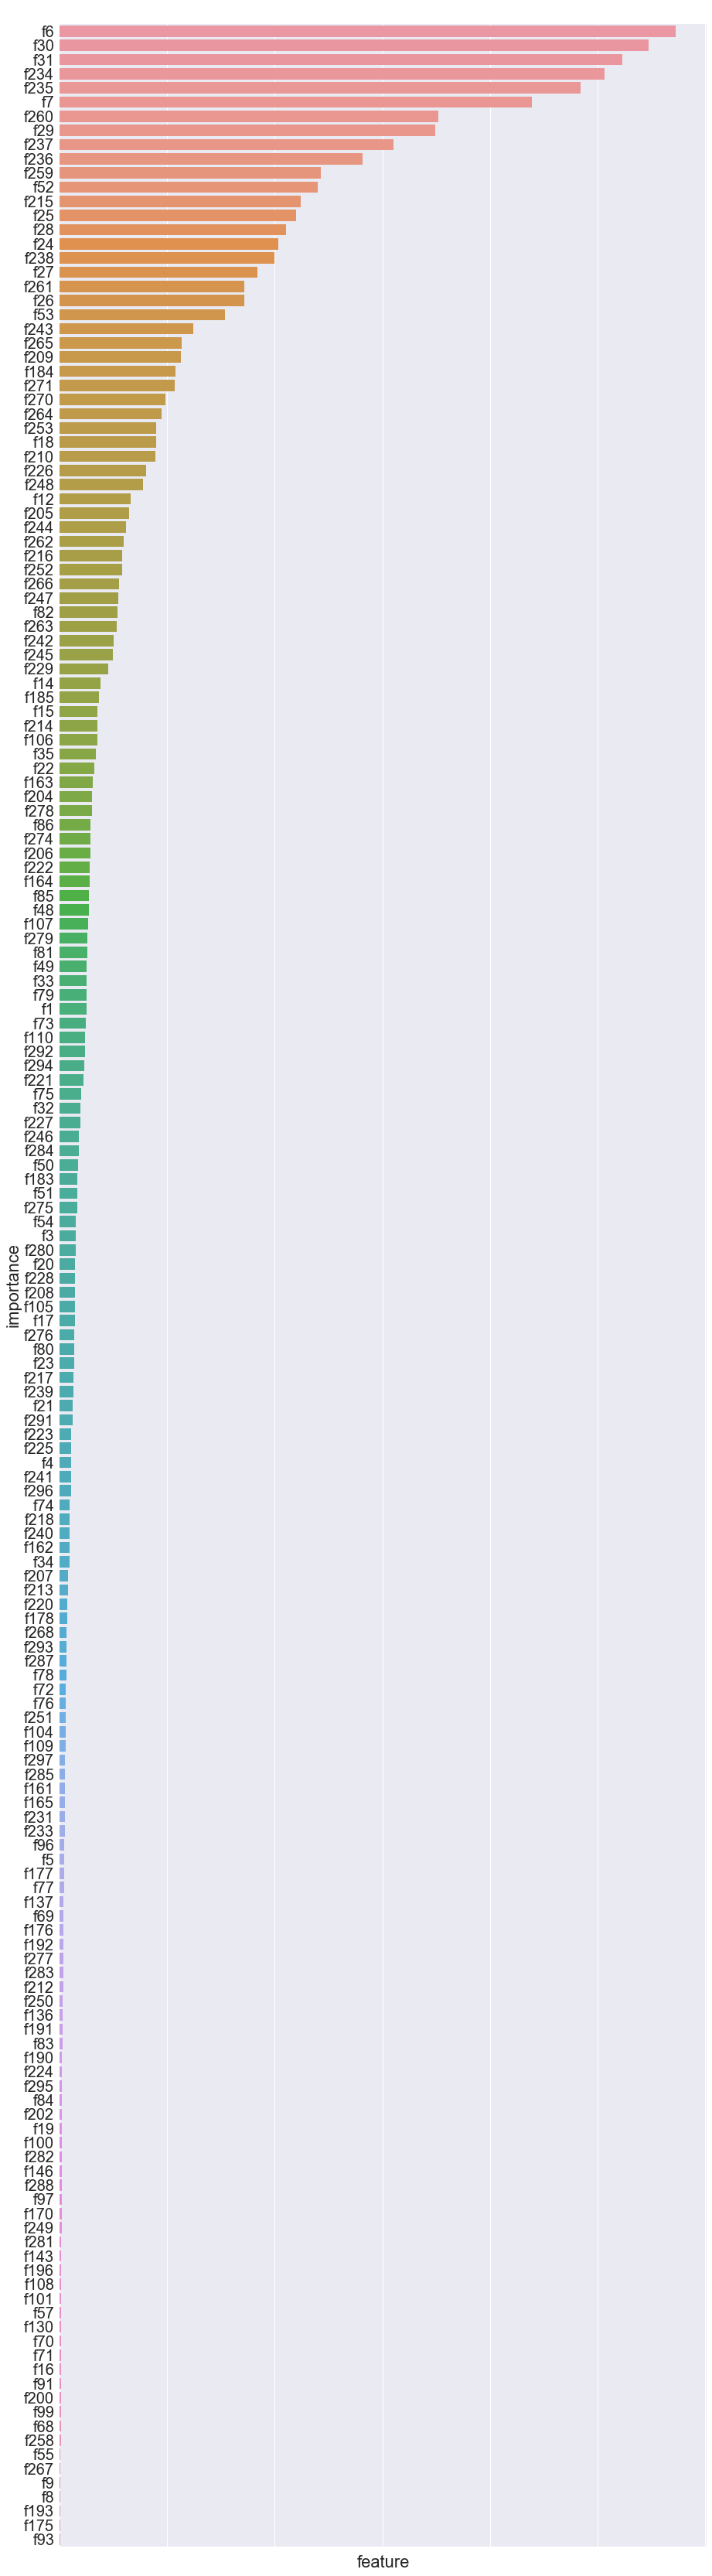

In [171]:
df_4 = pd.DataFrame({'feature': X_label.columns, 
                   'importance': rnd_clf_4.feature_importances_ })
df_4 = df_4.sort_values(by='importance', ascending =False)

df_4_ = df_4[df_4['importance'] != 0 ]
print(str(len(df_4_)) + ' features')

sns.set(rc={'figure.figsize':(15,60)})
sns.set(font_scale=2)                                           # set the font size 
ax = sns.barplot(y = 'feature', x = 'importance', data=df_4_)        #draw the barplot
ax.set(title = " ", xlabel = "feature", ylabel = "importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 0.01)
ax.tick_params(labelsize=20) 

In [172]:
t3 = pd.concat([df_1_, df_2_, df_3_, df_4_], axis = 1)
diff = []
for i in range(len(t)):
    if True in t3.isnull().values[i]:
        diff.append(i)
t3.iloc[diff,:]

feature  importance feature  importance feature  importance feature  \
3       NaN         NaN     NaN         NaN     NaN         NaN      f4   
7       NaN         NaN     NaN         NaN     NaN         NaN      f8   
18      NaN         NaN     NaN         NaN     NaN         NaN     f19   
55      f56    0.000410     NaN         NaN     f56    0.000410     NaN   
56      NaN         NaN     NaN         NaN     f57    0.000077     f57   
62      f63    0.000378     f63    0.000378     f63    0.000376     NaN   
70      NaN         NaN     NaN         NaN     NaN         NaN     f71   
83      NaN         NaN     NaN         NaN     NaN         NaN     f84   
87      f88    0.000120     f88    0.000121     f88    0.000120     NaN   
88      NaN         NaN     NaN         NaN     f89    0.000037     NaN   
89      f90    0.000114     f90    0.000115     f90    0.000115     NaN   
92      NaN         NaN     NaN         NaN     NaN         NaN     f93   
93      f94    0.000127     f94    0.000126     f94    0.000120     NaN   
94      f95    0.000404     f95    0.000403     f95    0.000400     NaN   
97      f98    0.000260     f98    0.000170     f98    0.000170     NaN   
102    f103    0.000059    f103    0.000058     NaN         NaN     NaN   
115    f116    0.000886    f116    0.000871    f116    0.000886     NaN   
120    f121    0.000119    f121    0.000120    f121    0.000120     NaN   
129     NaN         NaN     NaN         NaN     NaN         NaN    f130   
136     NaN         NaN     NaN         NaN     NaN         NaN    f137   
139     NaN         NaN     NaN         NaN    f140    0.000080     NaN   
142     NaN         NaN     NaN         NaN     NaN         NaN    f143   
145     NaN         NaN     NaN         NaN     NaN         NaN    f146   
160     NaN         NaN     NaN         NaN     NaN         NaN    f161   
169    f170    0.000127    f170    0.000126     NaN         NaN    f170   
189     NaN         NaN    f190    0.000067     NaN         NaN    f190   
192     NaN         NaN     NaN         NaN     NaN         NaN    f193   
200    f201    0.000081    f201    0.000080    f201    0.000081     NaN   
201     NaN         NaN     NaN         NaN     NaN         NaN    f202   
231    f232    0.000117    f232    0.000117    f232    0.000117     NaN   
238     NaN         NaN     NaN         NaN     NaN         NaN    f239   
248     NaN         NaN     NaN         NaN     NaN         NaN    f249   
257     NaN         NaN     NaN         NaN     NaN         NaN    f258   
266     NaN         NaN     NaN         NaN     NaN         NaN    f267   

     importance  
3      0.001056  
7      0.000071  
18     0.000206  
55          NaN  
56     0.000131  
62          NaN  
70     0.000113  
83     0.000220  
87          NaN  
88          NaN  
89          NaN  
92     0.000041  
93          NaN  
94          NaN  
97          NaN  
102         NaN  
115         NaN  
120         NaN  
129    0.000128  
136    0.000360  
139         NaN  
142    0.000139  
145    0.000171  
160    0.000463  
169    0.000163  
189    0.000230  
192    0.000063  
200         NaN  
201    0.000207  
231         NaN  
238    0.001269  
248    0.000162  
257    0.000089  
266    0.000072

* __Conclusion: balanced_subsample， balanced or the sample_weight = 80:1 are the same. But if unbalancing, the results differ a lot.__

In [215]:
pd.concat([df_1, df_2, df_3, df_4], axis = 1).loc[35:46,:]

feature  importance feature  importance feature  importance feature  \
35     f36         0.0     f36         0.0     f36         0.0     f36   
36     f37         0.0     f37         0.0     f37         0.0     f37   
37     f38         0.0     f38         0.0     f38         0.0     f38   
38     f39         0.0     f39         0.0     f39         0.0     f39   
39     f40         0.0     f40         0.0     f40         0.0     f40   
40     f41         0.0     f41         0.0     f41         0.0     f41   
41     f42         0.0     f42         0.0     f42         0.0     f42   
42     f43         0.0     f43         0.0     f43         0.0     f43   
43     f44         0.0     f44         0.0     f44         0.0     f44   
44     f45         0.0     f45         0.0     f45         0.0     f45   
45     f46         0.0     f46         0.0     f46         0.0     f46   
46     f47         0.0     f47         0.0     f47         0.0     f47   

    importance  
35         0.0  
36         0.0  
37         0.0  
38         0.0  
39         0.0  
40         0.0  
41         0.0  
42         0.0  
43         0.0  
44         0.0  
45         0.0  
46         0.0

* __The importance of f36 - f47, which have lots of NA,  are all 0。 So we can drop them directly.__

## 2.3 Prediction

## 2.3.1 Without using unlabel data

In [174]:
y_tr, y_te = train_test_split(y_label, test_size = 0.2, random_state =42)
print(len(y_tr), "train+", len(y_te), 'test')

792004 train+ 198002 test


In [208]:
X_tr = X.loc[y_tr.index,:]
X_te = X.loc[y_te.index,:]

In [209]:
rnd_clf_5 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, n_jobs = -1, random_state = 7, 
                                 class_weight = 'balanced')

In [210]:
rnd_clf_5.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=20, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [211]:
y_pred_1 = rnd_clf_5.predict(X_te)

In [212]:
confusion_matrix(y_te, y_pred_1)

array([[178645,  16876],
       [   251,   2230]])

In [216]:
y_pred_prob_1 = rnd_clf_5.predict_proba(X_te)

Text(0.5,1,'PR curve: AP=0.449')

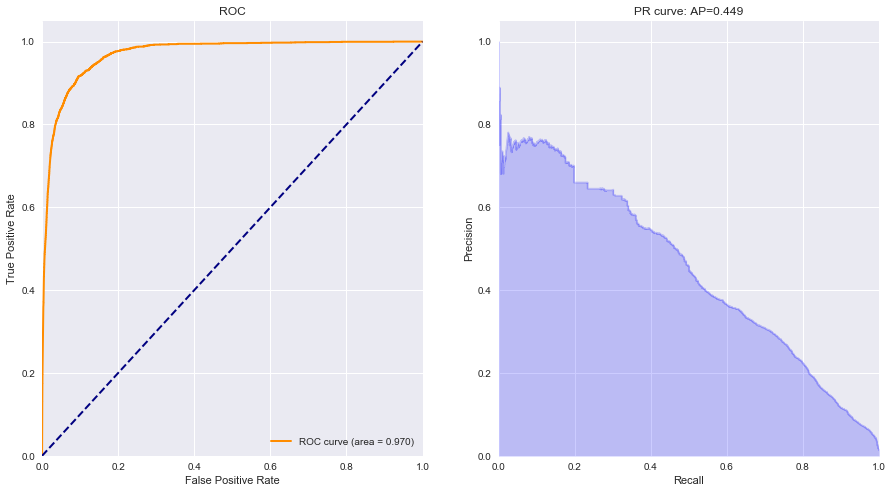

In [227]:
fpr1,tpr1,threshold1 = roc_curve(y_te, y_pred_prob_1[:,1]) 
roc_auc1 = auc(fpr1,tpr1)   
lw = 2

plt.figure(figsize = (15,8))
plt.subplot(121)
plt.plot(fpr1, tpr1, color='darkorange',  lw=lw, label='ROC curve (area = %0.3f)' % roc_auc1)   
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC')  
plt.legend(loc="lower right")  

precision1, recall1, thresholds1 = precision_recall_curve(y_te, y_pred_prob_1[:,1])
average_precision1 = average_precision_score(y_te, y_pred_prob_1[:,1])

plt.subplot(122)
plt.step(recall1, precision1, color='b', alpha=0.2,where='post')
plt.fill_between(recall1, precision1, step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve: AP={0:0.3f}'.format(average_precision1))

## 2.3.2  Set the unlabel value = 1

* __Since the unlabel is the high risk one, so we set the unlabel value = 1 first.__

In [229]:
ind_unlabel = y_raw == -1

In [231]:
X_unlabel = X[ind_unlabel]

In [232]:
X_unlabel.shape

(4725, 297)

In [233]:
X_2 = pd.concat([X_tr, X_unlabel])

In [230]:
y_unlabel_1 = pd.DataFrame(np.ones(len(y_unlabel)))

In [234]:
y_2 = pd.concat([y_tr, y_unlabel_1]).iloc[:,0]

In [235]:
rnd_clf_6 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, n_jobs = -1, random_state = 7, 
                                 class_weight = 'balanced')

In [237]:
rnd_clf_6.fit(X_2, y_2)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=20, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [238]:
y_pred_2 = rnd_clf_6.predict(X_te)

In [239]:
confusion_matrix(y_te, y_pred_2)

array([[170432,  25089],
       [   190,   2291]])

In [241]:
y_pred_prob_2 = rnd_clf_6.predict_proba(X_te)

Text(0.5,1,'PR curve: AP=0.325')

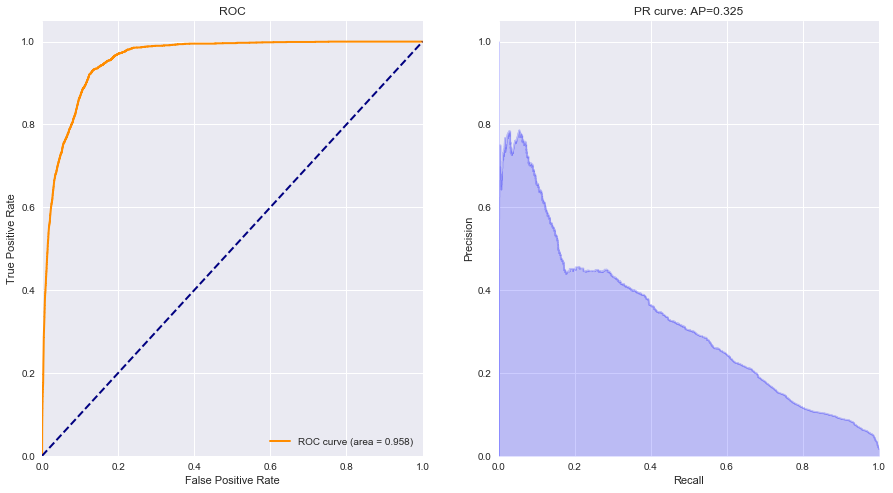

In [244]:
fpr2,tpr2,threshold2 = roc_curve(y_te, y_pred_prob_2[:,1]) 
roc_auc2 = auc(fpr2,tpr2)   
lw = 2

plt.figure(figsize = (15,8))
plt.subplot(121)
plt.plot(fpr2, tpr2, color='darkorange',  lw=lw, label='ROC curve (area = %0.3f)' % roc_auc2)   
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC')  
plt.legend(loc="lower right")  

precision2, recall2, thresholds2 = precision_recall_curve(y_te, y_pred_prob_2[:,1])
average_precision2 = average_precision_score(y_te, y_pred_prob_2[:,1])

plt.subplot(122)
plt.step(recall2, precision2, color='b', alpha=0.2,where='post')
plt.fill_between(recall2, precision2, step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve: AP={0:0.3f}'.format(average_precision2))

# 3  test 

In [33]:
test = pd.read_csv('atec_anti_fraud_test_a.csv')

In [247]:
X_test = test.iloc[:,2:]

In [250]:
X_test_ = X_test.copy()

In [251]:
X_test_norm = imputer.transform(X_test_)
X_test_ = pd.DataFrame(X_test_norm, columns = X_test_.columns)

In [252]:
y_test_prob = rnd_clf_1.predict_proba(X_test_)

In [255]:
score = y_test_prob[:,1]

In [256]:
final = pd.DataFrame({'id':test.iloc[:,0], 'score': score})

In [257]:
final

id     score
0       8e8290c270ec4bc3448dd5edd35c6f059b42d38f9ddd6f...  0.231247
1       f36c5fa5c0e7afccf733a4d74c7e06ffe43cc8fd24eda7...  0.357207
2       ee85f808b1fd49eaba308527e1686c509dc8e3e5057488...  0.112613
3       0df905aa187938d56a9b0816b13f54ac1f87d658a33cd0...  0.127775
4       15f532f979c4f092bbbe28e5409c8c3b8454ece8f1ab3e...  0.117424
5       614728f2aba299d20ddffca7e1ebc38ae8f239663562a9...  0.272066
6       3dc22d969895bc4afdaa5266d1586ae1a360adfcc638b5...  0.141656
7       b6cba0173d6a894f443578b5d82c00444dfe24c5e1705d...  0.101613
8       84d010a48c747947588589473e2ebdc59db3d348849c5b...  0.297088
9       bc00fec7ff8b3e4f8bd826048da109e7fe40fcc604ba28...  0.297984
10      85426887c8a4f4fd881ae1e79654940e35c68bfd681a5e...  0.106100
11      ee84ac886d80e779aeb5c4af65dbb8e087014d7c98b797...  0.222596
12      4cbb83002d62e3257d49d3742b0a27eb677ae1c464f69e...  0.151089
13      4e6ba7f2c84040ec8afde9f42c5bee3d53fd24e3df2929...  0.517138
14      032045573490536147dc7a4d7863407c3d2dc4e47d8ce5...  0.330218
15      187cbf2082730f6466823adbbbfe8b8e20c6fa6bcf67fe...  0.285025
16      596c89fe956456a0d990099c35fbca2bba67c32689f0fe...  0.646594
17      537db04fbbaa2bddc4fbb680cb9b10fc226709827b0223...  0.479087
18      a18bc6484d6dea76411aed24f9b94790f5f990a16ffcea...  0.089833
19      8841419781118cbfd94a34c7a061623195615582d8eda9...  0.097434
20      4cf2141914054e9623011ecfea7b62fcf8d3ba94a82551...  0.156945
21      5fbcdd4d10bcd0747a287d3b9b54f616171111e37def25...  0.083693
22      fe8e6d1092c0926d54d5a5aab6d6d8942c0925312e39c8...  0.080832
23      75a6a0fee2bf767d62ed4517bb100b4aa8c10da2d6d7b8...  0.534753
24      1c786dcb18dba07f986b664512b554f089091625835cac...  0.080527
25      81d59991505942c91533ef060e67f66c774dfb0415bdb0...  0.101105
26      6f841c3ac2b2c12d8a23cb76f0fb8feca702d9c9d4d55f...  0.252859
27      368c8d09b5c242a7e17aa854f76f23cad6c8a5e438708d...  0.911091
28      77b27e29a4c10eb00b4322e799b28d394eca67483a3d94...  0.272789
29      ad7457213e0a9b7711e61da87bdfac1b47663e75d42408...  0.110316
...                                                   ...       ...
491638  d4b098fafd692a295c57faa983dcd3d218f1a5b42ecbc7...  0.091389
491639  5d119d2140d142aec1b9a917aa429a30090bd262ee9a4f...  0.350812
491640  10c32fc8561fffb90da6b46e132fdf0afa1f7da9156565...  0.081437
491641  397128e474f229537fcfcfa69ac56b3436d98b40df02ab...  0.107929
491642  351899a089abec91effdb0aca1ccda5565c9a067cff688...  0.084448
491643  73268f49c5241e8103915e9ff5e842876f15af7e3c2fd2...  0.100563
491644  583f9b7aa46b175dc01cd2c9fdbde6a4cee26ee01a3fbc...  0.085984
491645  48df10c8d7fa90c0ab0c492dfacfbb00e9ba26b917be9b...  0.633666
491646  ea43529784f5bd6fed50c6e074dd5d07cab0d122eb8693...  0.104564
491647  e20eeab59588e330cc59ad51b11145642f643b94687069...  0.242475
491648  c73d0ac9086958ee08fb82960c2210bcd1550b94fa7749...  0.106197
491649  a045122827fd1aa6ee991d6e6b3c3a12639926fe7ca6aa...  0.074274
491650  02ade44f41fd9ebeb920357ca16ddb0083cd866c25c41f...  0.111030
491651  12200dddbac63d241e4a1699225ccc0becc419ba01f4e6...  0.603539
491652  762ae031e9db752bebf0c9312f61b100f166378184d52f...  0.897919
491653  055e3c7e1e998b442093f97c6c833bc1877d5f57b8db77...  0.618369
491654  4663485dc77da88d90a6d2a82a568ee1a09ed98d799e58...  0.248576
491655  7815e67aec26fe04fa157d0f748c1bb1e5a8958d896e4e...  0.270172
491656  4f1503eaa2d04abaa21f1206a0235158a0b445b94e1139...  0.168513
491657  0380f24a28d60b12d3ebdbec43e41f418f826dc110ceb2...  0.326000
491658  d71b2050e8d0712c8164e42640d673114df00db5ca6c8e...  0.443062
491659  cf1852995c7d7af3437f763914065e09b3a309dcb2385e...  0.073409
491660  eedbc73ba4f0f9a273cdc76a73494b2bde7c0042fa39fc...  0.228377
491661  cfa902b6cc55e0bdf72448cd1dbcfb74f6ac523d9cd636...  0.124004
491662  dca4519f5eafcd2f7dd0efb8fa5f747797b95b784b6dee...  0.069481
491663  6c81b06105883ca7a14663ab36b86c8d8c42063d9339bd...  0.641834
491664  ed66c4e4a0c12c25ccb5adde538bf4f23b5f0d78b72437...  0.064731
491665  d903a703b172bad8200e82755c24941892b

In [262]:
final.to_csv('/Users/lijh/Downloads/ATEC/final.csv',index=False)

##################### 2018-06-04 ########## To be continue ####### By: Li Jiahui #################

#  


In [367]:
y_label = y_raw[y_raw != -1]

792004 train+ 198002 test


# 20000 data

In [389]:
X_tr_part = X_tr.iloc[0:40000,:]
y_tr_part = y_tr[0:40000]

In [377]:
X_tr_part_imp = X_tr_part.iloc[:,ind]

# unlabel data all = 1

In [378]:
y_unlabel_1 = y_unlabel.copy()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

array([[170059,  25462],
       [   482,   1999]])

# semi based on EM 

## First time

In [221]:
y_unlabel_2 = rnd_clf.predict(X_unlabel)

In [222]:
y_unlabel_2 = pd.DataFrame(y_unlabel_2)

In [223]:
y2 = pd.concat([y_tr_part, y_unlabel_2]).iloc[:,0]

In [224]:
rnd_clf.fit(X2, y2)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=16, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [225]:
y_pred_rf = rnd_clf.predict(X_te)

In [226]:
confusion_matrix(y_te, y_pred_rf)

array([[171036,  24485],
       [   524,   1957]])

## Second time

In [65]:
y_unlabel2 = rnd_clf_1.predict(X_unlabel)
y_unlabel2 = pd.DataFrame(y_unlabel2)
y_tr_2 = pd.concat([y_tr, y_unlabel2])
y_tr_2 = y_tr_2.iloc[:,0]
rnd_clf_2 = RandomForestClassifier(n_estimators=200, max_leaf_nodes=20, n_jobs = -1)
rnd_clf_2.fit(X_tr_add_unlabel, y_tr_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
y_pred_rf_2 = rnd_clf_2.predict(X_te)

In [71]:
confusion_matrix(y_te, y_pred_rf_2)

array([[195517,      4],
       [  2458,     23]])

## Third time

In [ ]:
y_unlabel = rnd_clf.predict(X_unlabel)
# 合并 label unlabel 
X_tr_3
y_tr_3
rnd_clf_3 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs = -1)

rnd_clf_3.fit(X_tr_3, y_tr_3)

y_pred_rf_3 = rnd_clf_3.predict(X_te)

confusion_matrix(y_te, y_pred_rf_3)

# semi based on k-means

In [69]:
rnd_clf_2.fit(X_tr_add_unlabel, y_tr_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:

sklearn.cluster.KMeans(n_clusters=8, random_state=7, n_jobs= -1 )

# semi based on graph  regularization